# Assignment 3: Working with population data

We work with population data from [*Our World in Data*](https://ourworldindata.org/). The specific CVS dataset can be downloaded  from https://ourworldindata.org/population-growth#explore-data-poverty. The dataset is an annual time-series by country of population, both total population and population by various demographic groups.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

from IPython.display import Image, display

datadir = 'data/'
imagesdir = 'images/'

# datadir = '/content/drive/My Drive/Courses/672/Notebooks/Assignments/Ass3_C/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/Assignments/Ass3_C/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

In [2]:
renderer = None

def show(fig):
  fig.show(renderer=renderer)

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# read CSV datafile into a pandas dataframe
filename = 'population-and-demography.csv'
full_filename = datadir + filename
df = pd.read_csv(full_filename)

In [4]:
# print head and size of df
print(df.head(5))
print(len(df))

  Country name  Year  Population  Population of children under the age of 1  \
0  Afghanistan  1950     7480464                                   301735.0   
1  Afghanistan  1951     7571542                                   299368.0   
2  Afghanistan  1952     7667534                                   305393.0   
3  Afghanistan  1953     7764549                                   311574.0   
4  Afghanistan  1954     7864289                                   317584.0   

   Population of children under the age of 5  \
0                                    1248282   
1                                    1246857   
2                                    1248220   
3                                    1254725   
4                                    1267817   

   Population of children under the age of 15  Population under the age of 25  \
0                                     3068855                         4494349   
1                                     3105444                         4552

In [5]:
# view the columns
df.columns

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'population__all__20_24__records', 'population__all__25_29__records',
       'population__all__30_34__records', 'population__all__

We'll only keep a few of the columns and rename them for convenience.

In [6]:
# columns to keep
c = df.columns
c = list(c[:3]) + [c[5]] + [c[7]]
print(c)
df2 = df[c]
df2[:5]

['Country name', 'Year', 'Population', 'Population of children under the age of 15', 'Population aged 15 to 64 years']


,Country name,Year,Population,Population of children under the age of 15,Population aged 15 to 64 years
0,Afghanistan,1950,7480464,3068855,4198587
1,Afghanistan,1951,7571542,3105444,4250002
2,Afghanistan,1952,7667534,3145070,4303436
3,Afghanistan,1953,7764549,3186382,4356242
4,Afghanistan,1954,7864289,3231060,4408474


In [7]:
# rename some columns
d = {'Country name': 'Country', 'Population of children under the age of 15': 'Pop under 15', 'Population aged 15 to 64 years': 'Pop between 15 and 64'}
df2 = df2.rename(columns=d)
df2.columns

Index(['Country', 'Year', 'Population', 'Pop under 15',
       'Pop between 15 and 64'],
      dtype='object')

We add a calculated column for the population over 64 years of age.

In [8]:
df2['Pop over 64'] = df2['Population'] - (df2['Pop under 15'] + df2['Pop between 15 and 64'])
df2.columns

Index(['Country', 'Year', 'Population', 'Pop under 15',
       'Pop between 15 and 64', 'Pop over 64'],
      dtype='object')

In [9]:
df2.head(5)

,Country,Year,Population,Pop under 15,Pop between 15 and 64,Pop over 64
0,Afghanistan,1950,7480464,3068855,4198587,213022
1,Afghanistan,1951,7571542,3105444,4250002,216096
2,Afghanistan,1952,7667534,3145070,4303436,219028
3,Afghanistan,1953,7764549,3186382,4356242,221925
4,Afghanistan,1954,7864289,3231060,4408474,224755


In [10]:
# we don't need both dataframes.
# let df reference our main dataframe going forward.
df = df2
df.columns

Index(['Country', 'Year', 'Population', 'Pop under 15',
       'Pop between 15 and 64', 'Pop over 64'],
      dtype='object')

What are the countries in our dataframe `df`? Let's scan the *Country* column and identify unique names. Note that some of the countries, such as *'Africa (UN)'*, are aggregates.

In [11]:
# countries in df
countries = df.loc[:,'Country'].unique()
print(countries)

['Afghanistan' 'Africa (UN)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia (UN)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe (UN)' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

## Exercise 1

Define a function `plot_population(frame, country)` that takes the dataframe `df` and the name of one of its countries and returns a line chart of its total population (an annual time series). For example, the this code produces the following figure:

    fig = plot_population(df, 'United States')
    show(fig)


Take note of the chart's title (country name) and axis labels.

In [12]:
def plot_population(df, country):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,4))
    
    try: 
        filtered_df = df.loc[df['Country'] == country]


        plt.plot(filtered_df['Year'], filtered_df['Population'])
        plt.title(country)
        plt.xlabel('Year')
        plt.ylabel('Population')
        plt.grid(True)
        plt.yticks(ticks = [10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000], labels = ['10M', '15M', '20M', '25M', '30M', '35M', '40M', '45M', '50M'])
        
    
    except:
        print('Invalid country!')

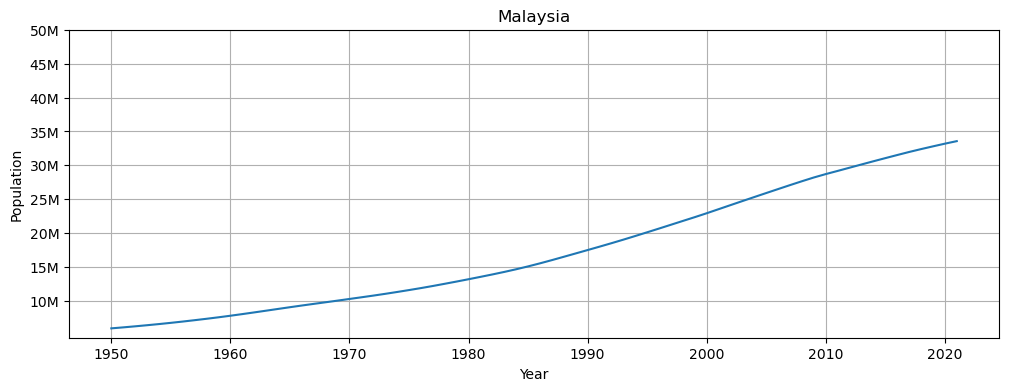

In [13]:
plot_population(df, 'Malaysia')

## Exercise 2

Define a function `plot_populations(frame, countries)` that takes dataframe `df` and a *list* of countries and returns a time-series plotting total population for those countries. Note that the countries are ordered lexicographically in the chart's legend. For example:

    fig = plot_populations(df, ['United States', 'Canada', 'Europe (UN)'])
    show(fig)

*Hint:* For this, you might want to construct a *pivoted* dataframe in which each relevant country has its own column. Refer to Assignment 2 for an example.

In [35]:
def plot_populations(df, countries):
    import matplotlib.pyplot as plt
    for i in countries:
        filtered_df = df.loc[df['Country'] == i]


        plt.plot(filtered_df['Year'], filtered_df['Population'])
        plt.xlabel('Year')
        plt.ylabel('Population')
        plt.grid(True)
        plt.legend(countries)
        plt.yticks(ticks = [50000000, 100000000, 150000000, 200000000, 250000000, 300000000], labels = ['50M', '100M', '150M', '200M', '250M', '300M'])
        

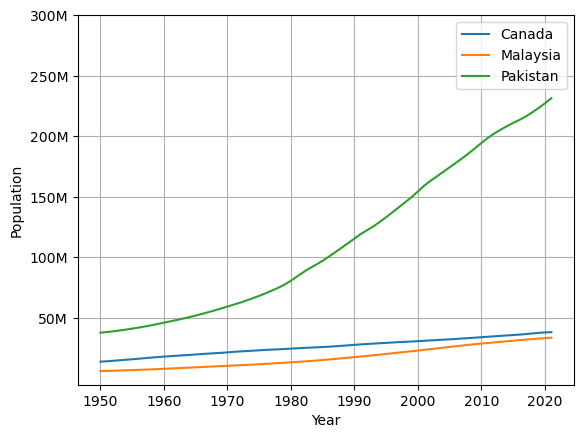

In [37]:
plot_populations(df, ['Canada', 'Malaysia', 'Pakistan'])

## Exercise 3

Write a function `plot_by_age_group(frame, country)` that returns a figure for a stacked bar chart. For each year, the bar stacks the population values for under 15 years of age, between 15 and 64 years of age, and over 64 years of age. Note the ordering of the three age categories (from youngest to oldest category) in the legend and chart's title and labels.

For example:

    fig = plot_by_age_group(df, 'United States')
    show(fig)

In [14]:
def plot_by_age_group(df, country):
    import matplotlib.pyplot as plt
    import pandas as pd
    filtered_df = df.loc[df['Country'] == country]
    bar_width = 0.6
    years = filtered_df['Year']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the data
    ax.bar(years, filtered_df['Pop under 15'], bar_width, label='Under 15')
    ax.bar(years, filtered_df['Pop between 15 and 64'], bar_width, bottom=filtered_df['Pop under 15'], label='15-64')
    ax.bar(years, filtered_df['Pop over 64'], bar_width, bottom=filtered_df['Pop under 15'] + filtered_df['Pop between 15 and 64'], label='Over 64')
    #ma = max(filtered_df['Population'])
    #one = ma / 5
    ax.set_yticks([50000000, 100000000, 150000000, 200000000, 250000000, 300000000])
    ax.set_yticklabels(['50M', '100M', '150M', '200M', '250M', '300M'])
    
    
    # Add labels, title, and legend
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    ax.set_title(f'Population by Age Group for {country}')
    ax.legend()
    
    
    # Show the plot
    #plt.show()
    
    #return fig

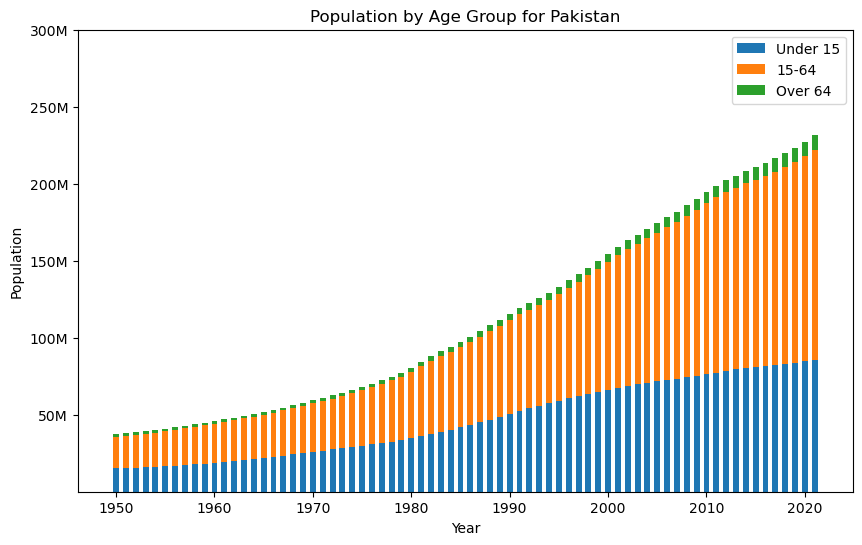

In [18]:
plot_by_age_group(df, 'Pakistan')

## Exercise 4

Define the function `plot_age_group_by_percentage(frame, country)` that returns a 100% stacked bar chart &ndash; that is, representing the percentage of each year's total population &ndash; that falls under each of the three age groups. For example:

    fig = plot_age_group_by_percentage(df, 'Japan')
    show(fig)

Hint: Add calculated columns to the dataframe `df`. For example:

      df['Under 15'] = 100 * df['Pop under 15'] / df['Population']

In [19]:
def plot_age_group_by_percentage(df, country):
    import matplotlib.pyplot as plt
    import pandas as pd
    filtered_df = df.loc[df['Country'] == country]
    bar_width = 0.6
    years = filtered_df['Year']
    filtered_df['Under 15 %']= 100* filtered_df['Pop under 15'] / filtered_df['Population']
    filtered_df ['between 15 and 64 %']= 100* filtered_df['Pop between 15 and 64']/ filtered_df ['Population']
    filtered_df ['Over 64 %']= 100* filtered_df['Pop over 64']/ filtered_df ['Population']
    
    years = filtered_df['Year']
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.bar(years, filtered_df['Under 15 %'], bar_width, label='Under 15')
    ax.bar(years, filtered_df['between 15 and 64 %'], bar_width, bottom=filtered_df['Under 15 %'], label='15-64')
    ax.bar(years, filtered_df['Over 64 %'], bar_width, bottom=filtered_df['Under 15 %'] + filtered_df['between 15 and 64 %'], label='Over 64')
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Population')
    ax.set_title(f'Population by Age Group Percentage for {country}')
    
    #ax.set_yticks([40000000, 80000000, 120000000, 160000000, 200000000])
    #ax.set_yticklabels(['40M', '80M', '120M', '160M', '200M'])
    ax.legend()
   # plt.yticks(ticks=[40000000, 80000000, 120000000, 160000000, 200000000], labels=['40M', '80M', '120M', '160M', '200M'])
    
    plt.show()
    #print(max(filtered_df['Population']))
                                        
    

C:\Users\dell\AppData\Local\Temp\ipykernel_11168\1737045544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Under 15 %']= 100* filtered_df['Pop under 15'] / filtered_df['Population']
C:\Users\dell\AppData\Local\Temp\ipykernel_11168\1737045544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df ['between 15 and 64 %']= 100* filtered_df['Pop between 15 and 64']/ filtered_df ['Population']
C:\Users\dell\AppData\Local\Temp\ipykernel_11168\1737045544.py:9: SettingWithCopyWarning: 
A 

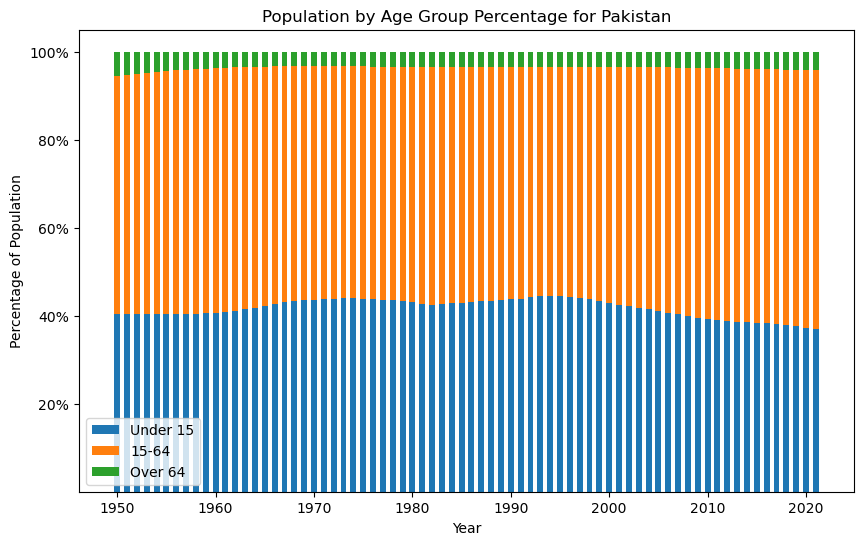

In [20]:
plot_age_group_by_percentage(df, 'Pakistan')

# Exercise 5

Let's construct a geographical enhanced scatterplot where we place a bubble over each country where the bubble's size corresponds to the country's total population. Here's an example for the year 2020:

In [165]:
df2 = df[df['Year'] == 2020]
fig = px.scatter_geo(df2, locations='Country', locationmode='country names',
                     hover_name="Country", size="Population",
                     projection="natural earth")
show(fig)

The bubbles are quite small; we want them to be bigger. Also the bubbles are all blue; we want each bubble's color to correspond to the country's total population, in addition to the bubble's size. Choose a colorful colormap for your colors. We choose to eliminate the colorbar that shows maps colors to population values because we're able to hover the mouse over a country's bubble to see its population in a tooltip. Here's an example for the year 2000:

    fig = population_map(df, 2000)
    show(fig)

*Hint:* Visit the page https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo for relevant parameters. From your dataframe, eliminate any rows with *Country* value equal to 'Less developed regions, excluding China' which gets interpreted as a country.

In [25]:
def population_map(df, year):
    import pandas as pd
    import plotly.express as px
    df_filtered = df[(df['Country'] != 'Less developed regions, excluding China') & (df['Year'] == year)]
    
    fig = px.scatter_geo(df_filtered, locations='Country', locationmode='country names',
                         hover_name="Country", size="Population",
                         color="Population", projection="natural earth",
                         size_max=100, color_continuous_scale=px.colors.sequential.Plasma
                           
                         )
    fig.update_layout(coloraxis_showscale=False)
    
    return fig


In [164]:
population_map(df, 2015)

## Something extra

Note there are a four *Country* values that aggregate countries by income level.

In [28]:
countries = df.Country.unique()
income_levels = list(filter(lambda c: 'income' in c, countries))
income_levels

['High-income countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'Upper-middle-income countries']

Using ideas from Exercises 2 and 4, we can write functions that plot a time-series and a 100% stacked bar chart for population by income level. My plots follow. Try this if you wish to.

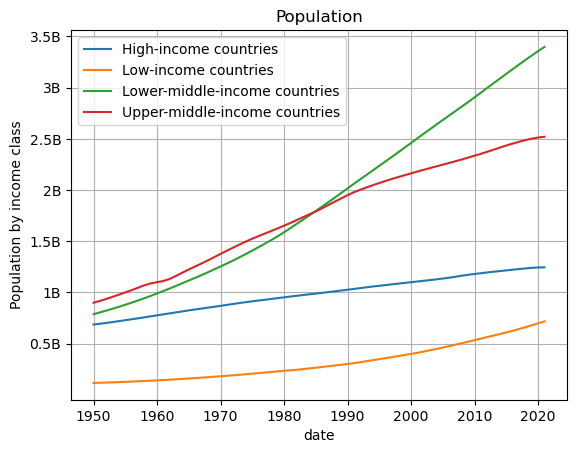

In [29]:
cla = ['High-income countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'Upper-middle-income countries']
import matplotlib.pyplot as plt
for i in cla:
    filtered_df = df.loc[df['Country'] == i]
    #plt.figure(figsize=(9,6))
    plt.plot(filtered_df['Year'], filtered_df['Population'])
    plt.legend(cla)
    plt.grid(True)
    plt.title('Population')
    plt.xlabel('date')
    plt.ylabel('Population by income class')
    
    plt.yticks(ticks= [1000000000 * 0.5, 1000000000, 1000000000 * 1.5, 1000000000 * 2, 1000000000 * 2.5, 1000000000 * 3, 1000000000 * 3.5], labels = ['0.5B', '1B', '1.5B', '2B', '2.5B', '3B', '3.5B'])
    
    #print(max(filtered_df['Population']))
    
    

# manipulating dataset for extra task 2

In [92]:
df_high = df[df['Country'] == 'High-income countries']
df_low = df[df['Country'] == 'Low-income countries']
df_l_m = df[df['Country'] == 'Lower-middle-income countries']
df_u_m = df[df['Country'] == 'Upper-middle-income countries']



In [152]:
l = []
for i in df_u_m['Population']:
    l.append(i)
l1 = []
for i in df_high['Population']:
    l1.append(i)
l3 = []
for i in df_low['Population']:
    l3.append(i)
l4 = []
for i in df_l_m['Population']:
    l4.append(i)

In [154]:
d = pd.DataFrame()

In [155]:
d['High_income'] = l1
d['low_income'] = l3

In [156]:
d['Low_mid'] = l4
d['Upper_mid'] = l1

In [157]:
d.head()

,High_income,low_income,Low_mid,Upper_mid
0,687356540,117442280,788620700,687356540
1,694993200,119053230,805591040,694993200
2,702997900,120934696,823223500,702997900
3,711557000,123105460,841477400,711557000
4,720488450,125475416,860486700,720488450


In [158]:
d['Total'] = d[['High_income', 'low_income', 'Low_mid', 'Upper_mid']].sum(axis=1)

In [159]:
d.head()

,High_income,low_income,Low_mid,Upper_mid,Total
0,687356540,117442280,788620700,687356540,2280776060
1,694993200,119053230,805591040,694993200,2314630670
2,702997900,120934696,823223500,702997900,2350153996
3,711557000,123105460,841477400,711557000,2387696860
4,720488450,125475416,860486700,720488450,2426939016


In [160]:
d['year'] = [i for i in range(1950, 2022)]

In [161]:
d.head()

,High_income,low_income,Low_mid,Upper_mid,Total,year
0,687356540,117442280,788620700,687356540,2280776060,1950
1,694993200,119053230,805591040,694993200,2314630670,1951
2,702997900,120934696,823223500,702997900,2350153996,1952
3,711557000,123105460,841477400,711557000,2387696860,1953
4,720488450,125475416,860486700,720488450,2426939016,1954


In [162]:
percentage_df = d[['High_income', 'low_income', 'Low_mid', 'Upper_mid']].div(d['Total'], axis=0) * 100

In [163]:
percentage_df

,High_income,low_income,Low_mid,Upper_mid
0,30.136959,5.149225,34.576858,30.136959
1,30.026095,5.143509,34.804302,30.026095
2,29.912844,5.145820,35.028492,29.912844
3,29.800977,5.155825,35.242221,29.800977
4,29.687126,5.170110,35.455638,29.687126
...,...,...,...,...
67,19.424445,10.171401,50.979709,19.424445
68,19.294789,10.330636,51.079786,19.294789
69,19.164421,10.502482,51.168676,19.164421
70,19.013016,10.685293,51.288674,19.013016


# Making graph 

<BarContainer object of 72 artists>

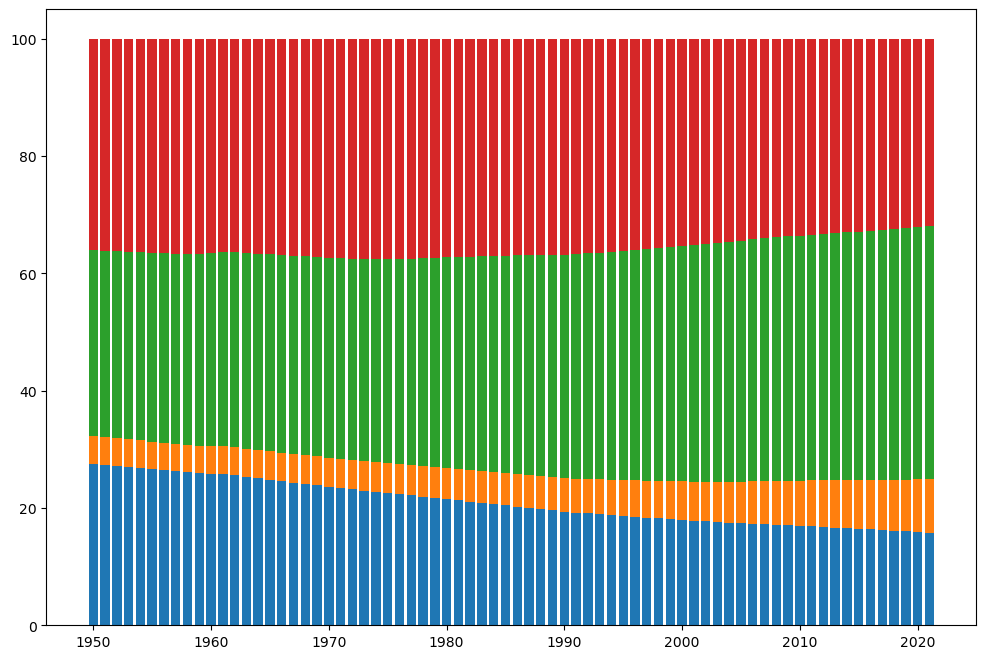

In [150]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(d['year'], percentage_df['High_income'])
ax.bar(d['year'], percentage_df['low_income'], bottom=percentage_df['High_income'])
ax.bar(d['year'], percentage_df['Low_mid'], bottom=percentage_df['low_income'] + percentage_df['High_income'])
ax.bar(d['year'], percentage_df['Upper_mid'], bottom=percentage_df['Low_mid']+percentage_df['low_income'] + percentage_df['High_income'])

